# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: Emma Teszner

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [8]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Paired")

## Genes correlation [25 pts]

In [17]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("/u/teznerem/gene_expression_cancer_.csv")
data

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Dead
146,6.3,2.5,5.0,1.9,Dead
147,6.5,3.0,5.2,2.0,Dead
148,6.2,3.4,5.4,2.3,Dead


In [18]:
data = pd.read_csv("/u/teznerem/gene_expression_cancer_.csv", header = 0)

In [19]:
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

In [20]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative ='two-sided')
print("Pearson correlation: ")

reg.rvalue

Pearson correlation: 


np.float64(-0.10936924995064938)

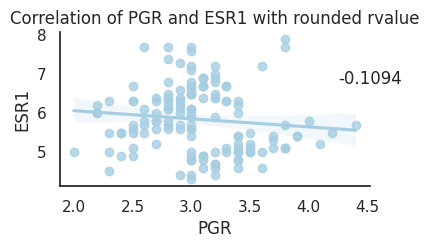

In [21]:
p = sns.regplot(data, x="PGR", y="ESR1")
#regression plotting
p.text(4.25, 6.75, np.round(reg.rvalue, 4))
p.set_title("Correlation of PGR and ESR1 with rounded rvalue")
sns.despine()

In [22]:
#Interpretation: the PGR and ESR1 genes do not correlate as the rvalue is -0.1094 and the regression plot shows a non-linear correlation.

### Grouped correlations [14 pts]

In [23]:
### Consider the same two genes, but assess correlation based on the ("Results").
sub = data.loc[:, ["PGR", "ESR1", "Results"]]
print(sub)

datasub_Results_a = sub.loc[sub ["Results"] == "Cured"]
#print(datasub_Results_a)

     PGR  ESR1 Results
0    3.5   5.1   Cured
1    3.0   4.9   Cured
2    3.2   4.7   Cured
3    3.1   4.6   Cured
4    3.6   5.0   Cured
..   ...   ...     ...
145  3.0   6.7    Dead
146  2.5   6.3    Dead
147  3.0   6.5    Dead
148  3.4   6.2    Dead
149  3.0   5.9    Dead

[150 rows x 3 columns]


In [24]:
sub_a= sp.stats.linregress(x=datasub_Results_a.PGR, y=datasub_Results_a.ESR1, alternative = 'two-sided')
sub_a.rvalue

np.float64(0.7467803732639268)

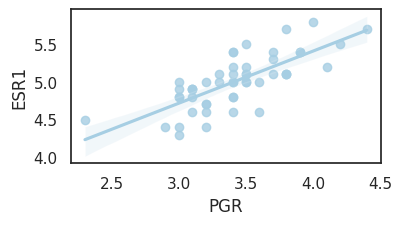

In [25]:
s_a=sns.regplot(datasub_Results_a, x="PGR", y="ESR1")

In [26]:
datasub_Results_b = sub.loc[sub ["Results"] == "Recurrence"]
#print(datasub_Results_2)

In [27]:
sub_b= sp.stats.linregress(x=datasub_Results_b.PGR, y=datasub_Results_b.ESR1, alternative = 'two-sided')
sub_b.rvalue

np.float64(0.5280216842864213)

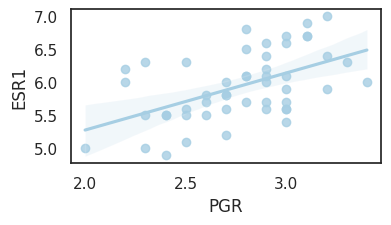

In [28]:
s_b=sns.regplot(datasub_Results_b, x="PGR", y="ESR1")

In [29]:
datasub_Results_c = sub.loc[sub ["Results"] == "Dead"]
#print(datasub_Results_c)

In [30]:
sub_c= sp.stats.linregress(x=datasub_Results_c.PGR, y=datasub_Results_c.ESR1, alternative = 'two-sided')
sub_c.rvalue

np.float64(0.46200631074260196)

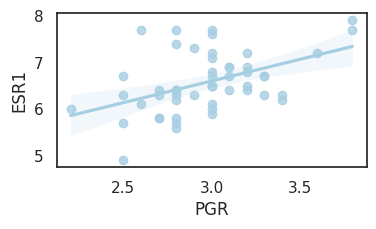

In [31]:
s_c=sns.regplot(datasub_Results_c, x="PGR", y="ESR1")

In [32]:
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).


#The results reveal that within the specific conditions (cured, recurrence, and dead), there is a moderate positive correlation between PGR and ESR1 expressiob indicating
##that while there may not be a positive global correlation, certain clinical conditions might reveal a relationship between these genes' expressions, suggesting 
###the need for context-specific analyses in gene expression studies. 

### Spearman's rank correlation [5 pts]

In [33]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)

speaR = sp.stats.spearmanr(data.PGR, data.ESR1)
speaR

SignificanceResult(statistic=np.float64(-0.15945651848582867), pvalue=np.float64(0.05128491483834292))

In [34]:
speaR = sp.stats.spearmanr(datasub_Results_a.PGR, datasub_Results_a.ESR1)
speaR

SignificanceResult(statistic=np.float64(0.7686085073729368), pvalue=np.float64(7.161781507883594e-11))

In [35]:
speaR = sp.stats.spearmanr(datasub_Results_b.PGR, datasub_Results_b.ESR1)
speaR

SignificanceResult(statistic=np.float64(0.5180736821877614), pvalue=np.float64(0.00013742136038254855))

In [36]:
speaR = sp.stats.spearmanr(datasub_Results_c.PGR, datasub_Results_c.ESR1)
speaR

SignificanceResult(statistic=np.float64(0.4389928351262457), pvalue=np.float64(0.0012702598513604905))

In [37]:
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.


#In the global dataset there is no significant correlation between PGR and ESR1 expression and this is consistent 
##with the previous conclusion that there was no strong linear relationship.

#In the cured dataset there is a strong positive and statistically significant correlation between PGR and ESR1 
##expression which differs from the global conclusion, highlighting that in cured patients, the expression levels of these two genes are strongly linked.

#In the recurrence dataset there is a moderate positive and statistically significant correlation between PGR and ESR1 
##expression which differs from the global conclusion, suggesting that in patients with recurrence, the expressions of these genes are moderately associated.

#In the dead dataset there is a moderate positive and statistically significant correlation between PGR and ESR1 
##expression which  also differs from the global conclusion, indicating that in deceased patients, the expressions of these genes are moderately associated.

### Briefly explain what are the new conclusions.

#All in all, these results indicate that while there may not be a significant global correlation between PGR and ESR1 expressions, specific 
##patient conditions (cured, recurrence, dead) show significant positive correlations. This implies that the relationship between these 
###genes' expressions is context-dependent, varying significantly with the clinical condition of the patients.
